<a href="https://colab.research.google.com/github/seokhee516/ML-DL-playground/blob/main/_3_1_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 보스턴 주택 가격 모델

### modules import

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### 데이터 로드
- 데이터의 수가 상당히 적기 때문에 테스트 데이터의 비율을 20%로 지정

- 13개의 특성을 가짐

- 각각의 특성이 모두 다른 스케일, 즉 단위가 모두 다름
  - 범죄율: 0~1 사이의 값
  - 방의 개수 3~9 사이의 값

- 정답 레이블은 주택 가격의 중간가격($1000 단위)

In [2]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path= 'boston_housing.npz',
                                                           test_split=0.2, 
                                                           seed =111)

65536/57026 [==================================] - 0s 0us/step


### 데이터 확인

In [3]:
print("학습 데이터: {}\t레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("테스트 데이터: {}\t레이블: {}".format(x_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
테스트 데이터: (102, 13)	레이블: (102,)


In [4]:
print(x_train_full[0])

[2.8750e-02 2.8000e+01 1.5040e+01 0.0000e+00 4.6400e-01 6.2110e+00
 2.8900e+01 3.6659e+00 4.0000e+00 2.7000e+02 1.8200e+01 3.9633e+02
 6.2100e+00]


In [5]:
print(y_train_full[0])

25.0


### 데이터 전처리
- Standardization

- 특성의 단위가 모두 다르기 때문에 **동일한 범위로 조정**

[표준 정규분포 데이터 표준화](https://rfriend.tistory.com/268)
- z = (x-mean())/std()

In [6]:
mean = np.mean(x_train_full, axis=0)
std = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std

x_train, x_val, y_train, y_val = train_test_split(x_train_preprocessed, y_train_full,
                                                  test_size = 0.3,
                                                  random_state = 111)

In [7]:
print("학습 데이터: {}\t레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {}\t레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {}\t레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {}\t레이블: {}".format(x_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
학습 데이터: (282, 13)	레이블: (282,)
검증 데이터: (122, 13)	레이블: (122,)
테스트 데이터: (102, 13)	레이블: (102,)


### 모델 구성
- 학습 데이터가 매우 적은 경우에 모델의 깊이를 깊게 할수록  
  과대적합(Overfitting)이 일어날 확률이 높음

In [8]:
model = Sequential([Dense(100, activation='relu', input_shape=(13,), name ='dense1'),
                    Dense(64, activation='relu', name='dense2'),
                    Dense(32, activation='relu', name='dense3'),
                    Dense(1, name='output')])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 100)               1400      
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 9,977
Trainable params: 9,977
Non-trainable params: 0
_________________________________________________________________


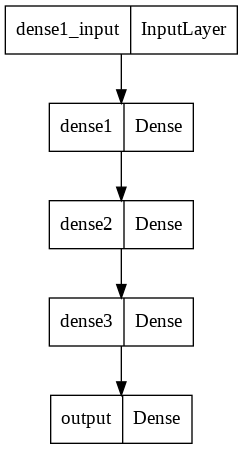

In [10]:
plot_model(model)

### 모델 컴파일(compile)

- 회귀 문제에서는 주로 평균제곱오차(MSE, Mean Squared Error)를 손실함수로,  
  평균절대오차(MAE, Mean Absolute Error)를 평가지표로 많이 사용!

In [11]:
model.compile(loss='mse',
              optimizer=Adam(learning_rate=1e-2),
              metrics=['mae'])

### 모델 학습

In [12]:
history = model.fit(x_train, y_train, epochs=300,
                    validation_data=(x_val, y_val))

Epoch 1/300
9/9 [==============================] - 2s 59ms/step - loss: 285.1888 - mae: 14.0729 - val_loss: 132.4612 - val_mae: 9.1090
Epoch 2/300
9/9 [==============================] - 0s 13ms/step - loss: 60.9891 - mae: 5.9218 - val_loss: 31.4368 - val_mae: 4.4589
Epoch 3/300
9/9 [==============================] - 0s 10ms/step - loss: 33.7114 - mae: 4.2293 - val_loss: 22.2753 - val_mae: 3.6017
Epoch 4/300
9/9 [==============================] - 0s 12ms/step - loss: 21.5946 - mae: 3.4391 - val_loss: 13.9826 - val_mae: 2.9190
Epoch 5/300
9/9 [==============================] - 0s 11ms/step - loss: 16.3538 - mae: 2.8935 - val_loss: 11.7222 - val_mae: 2.7147
Epoch 6/300
9/9 [==============================] - 0s 10ms/step - loss: 13.6432 - mae: 2.5889 - val_loss: 10.9746 - val_mae: 2.5883
Epoch 7/300
9/9 [==============================] - 0s 7ms/step - loss: 12.6475 - mae: 2.4426 - val_loss: 9.1843 - val_mae: 2.3985
Epoch 8/300
9/9 [==============================] - 0s 14ms/step - loss: 12.

### 모델 평가 
- `evaluate()`

In [13]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 13.9617 - mae: 2.6247


[13.961652755737305, 2.624713659286499]

In [14]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


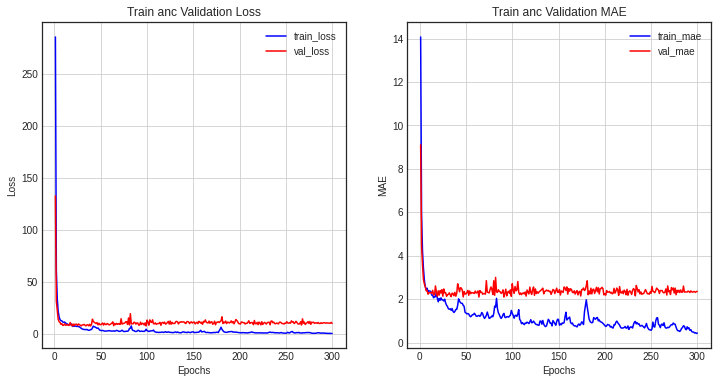

In [15]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train anc Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, mae, color='blue', label='train_mae')
ax2.plot(epochs, val_mae, color='red', label='val_mae')
ax2.set_title('Train anc Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

loss가 급하게 줄어들고 그 후엔 거의 변화가 없음

### K-Fold 교차 검증

- 데이터셋의 크기가 매우 작은 경우에  
  [훈련, 검증, 테스트] 데이터로 나누게 되면 과소적합이 일어날 확률이 높음

- 이를 해결하기 위해 K-Fold 교차 검증 실행
  <br>

  <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="600">

  <sub>출처: https://scikit-learn.org/stable/modules/cross_validation.html</sub>

### 모델 재구성

In [16]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold

In [22]:
tf.random.set_seed(42)
(x_train_full, y_train_full), (x_test, y_test) = load_data(path = 'boston_housing.npz', 
                                                           test_split = 0.2, seed = 42)

mean = np.mean(x_train_full, axis=0)
std = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / mean

In [18]:
k = 3
# shuffle=True 넣어주어야 오류 안남
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

In [19]:
def build_model():
  input = Input(shape = (13, ), name = 'input')
  hidden1 = Dense(100, activation = 'relu', name = 'dense1')(input)
  hidden2 = Dense(64, activation = 'relu', name = 'dense2')(hidden1)
  hidden3 = Dense(32, activation = 'relu', name = 'dense3')(hidden2)
  output = Dense(1, name = 'output')(hidden3)

  model1 = Model(inputs = [input], outputs = output)
  model.compile(loss = 'mse', 
                optimizer = 'adam',
                metrics = ['mae'])
  return model

In [20]:
mae_list = []

In [23]:
for train_idx, val_idx in kfold.split(x_train):
  x_train_fold, x_val_fold = x_train_preprocessed[train_idx], x_train_preprocessed[val_idx]
  y_train_fold, y_val_fold = y_train_full[train_idx], y_train_full[val_idx] 

  model = build_model()
  model.fit(x_train_fold, y_train_fold, epochs = 300, 
            validation_data = (x_val_fold, y_val_fold)) 
  
  _, test_mae = model.evaluate(x_test, y_test)
  mae_list.append(test_mae)

Epoch 1/300
6/6 [==============================] - 1s 37ms/step - loss: 7.1125 - mae: 1.5820 - val_loss: 3.5341 - val_mae: 1.1983
Epoch 2/300
6/6 [==============================] - 0s 7ms/step - loss: 5.8278 - mae: 1.4902 - val_loss: 3.6542 - val_mae: 1.2204
Epoch 3/300
6/6 [==============================] - 0s 7ms/step - loss: 5.1878 - mae: 1.4331 - val_loss: 3.8274 - val_mae: 1.2462
Epoch 4/300
6/6 [==============================] - 0s 11ms/step - loss: 4.7482 - mae: 1.3664 - val_loss: 3.5455 - val_mae: 1.1996
Epoch 5/300
6/6 [==============================] - 0s 7ms/step - loss: 4.2651 - mae: 1.3048 - val_loss: 4.0596 - val_mae: 1.2770
Epoch 6/300
6/6 [==============================] - 0s 10ms/step - loss: 3.9422 - mae: 1.2317 - val_loss: 3.7705 - val_mae: 1.2285
Epoch 7/300
6/6 [==============================] - 0s 8ms/step - loss: 3.7274 - mae: 1.2060 - val_loss: 3.6963 - val_mae: 1.2223
Epoch 8/300
6/6 [==============================] - 0s 7ms/step - loss: 3.4108 - mae: 1.1688 - 

In [24]:
print(mae_list)

[9.223221778869629, 8.990649223327637, 8.834514617919922]


In [25]:
print(np.mean(mae_list))

9.016128540039062
